In [3]:
#importing the libaries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from dataclasses import dataclass

In [4]:
@dataclass

# This class represents the grid
class grid:
  grid_size : int
  max_value : int
  mode : int 
  finished : bool = False

  # creates a grid of specified parameters
  def create_grid(self):
    self.map = np.random.randint(1, self.max_value, size=(self.grid_size, self.grid_size))
    self.map[0,0]=0
    self.map[self.grid_size-1,self.grid_size-1]=0
  
  # used for displaying the grid
  def display_grid(self,figure_size=8):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.matshow(self.map, cmap=plt.cm.Blues, vmin=0, vmax=self.max_value)
    for i in range(self.grid_size):
        for j in range(self.grid_size):
          c = self.map[j,i]
          ax.text(i, j, str(c), va='center', ha='center')

  def Heuristic_path(self):
    x,y=0,0
    count=0

    if self.mode > 2 or self.mode < 1:
      raise ValueError("Incorrect Mode Selected, it should be either 1 or 2")

    while not self.finished:
      
      # move to x+1,y
      if x < self.grid_size-1:
        if self.distmap[x+1,y]>self.map[x+1,y]+self.distmap[x,y] and not self.visited[x+1,y]:
          if self.mode==1:
            self.distmap[x+1,y]=self.map[x+1,y]+self.distmap[x,y]
          elif self.mode==2:
            self.distmap[x+1,y]=abs(self.map[x+1,y]-self.distmap[x,y])

          self.originmap[x+1,y]=np.ravel_multi_index([x,y], (self.grid_size,self.grid_size))

      if y < self.grid_size-1:
        if self.distmap[x,y+1]>self.map[x,y+1]+self.distmap[x,y] and not self.visited[x,y+1]:
          if self.mode==1:
            self.distmap[x,y+1]=self.map[x,y+1]+self.distmap[x,y]
          elif self.mode==2:
            self.distmap[x,y+1]=abs(self.map[x,y+1]-self.distmap[x,y])
          self.originmap[x,y+1]=np.ravel_multi_index([x,y], (self.grid_size,self.grid_size))

      self.visited[x,y]=True
      dismaptemp=self.distmap
      dismaptemp[np.where(self.visited)]=np.Infinity
      
      # now we find the shortest path so far
      minpost=np.unravel_index(np.argmin(dismaptemp),np.shape(dismaptemp))
      x,y=minpost[0],minpost[1]
      if x==self.grid_size-1 and y==self.grid_size-1:
        self.finished=True
      count=count+1

    # Start backtracking to plot the path  
    self.mattemp=self.map.astype(float)
    x,y=self.grid_size-1,self.grid_size-1
    self.path=[]
    self.mattemp[int(x),int(y)]=np.nan

    while x>0.0 or y>0.0:
      self.path.append([int(x),int(y)])
      xxyy=np.unravel_index(int(self.originmap[int(x),int(y)]), (self.grid_size,self.grid_size))
      x,y=xxyy[0],xxyy[1]
      self.mattemp[int(x),int(y)]=np.nan

    self.path.append([int(x),int(y)])

  # used for computing the additional arrays required for computation of the path
  def compute_auxilary_arrays(self):
    self.distmap=np.ones((self.grid_size,self.grid_size),dtype=int)*np.Infinity
    self.distmap[0,0]=0
    self.originmap=np.ones((self.grid_size,self.grid_size),dtype=int)*np.nan
    self.visited=np.zeros((self.grid_size,self.grid_size),dtype=bool)
    self.finished = False

  # computes the shortest path using teh dijkstra's algorithm
  def find_shortest_path(self):
    x,y=0,0
    count=0

    if self.mode > 2 or self.mode < 1:
      raise ValueError("Incorrect Mode Selected, it should be either 1 or 2")

    #Loop Dijkstra until reaching the target cell
    while not self.finished:

      # move to x+1,y
      if x < self.grid_size-1:
        if self.distmap[x+1,y]>self.map[x+1,y]+self.distmap[x,y] and not self.visited[x+1,y]:
          if self.mode==1:
            self.distmap[x+1,y]=self.map[x+1,y]+self.distmap[x,y]
          elif self.mode==2:
            self.distmap[x+1,y]=abs(self.map[x+1,y]-self.distmap[x,y])

          self.originmap[x+1,y]=np.ravel_multi_index([x,y], (self.grid_size,self.grid_size))

      # move to x-1,y
      if x>0:
        if self.distmap[x-1,y]>self.map[x-1,y]+self.distmap[x,y] and not self.visited[x-1,y]:
          if self.mode==1:
            self.distmap[x-1,y]=self.map[x-1,y]+self.distmap[x,y]
          elif self.mode==2:
            self.distmap[x-1,y]=abs(self.map[x-1,y]-self.distmap[x,y])
          self.originmap[x-1,y]=np.ravel_multi_index([x,y], (self.grid_size,self.grid_size))
      
      # move to x,y+1
      if y < self.grid_size-1:
        if self.distmap[x,y+1]>self.map[x,y+1]+self.distmap[x,y] and not self.visited[x,y+1]:
          if self.mode==1:
            self.distmap[x,y+1]=self.map[x,y+1]+self.distmap[x,y]
          elif self.mode==2:
            self.distmap[x,y+1]=abs(self.map[x,y+1]-self.distmap[x,y])
          self.originmap[x,y+1]=np.ravel_multi_index([x,y], (self.grid_size,self.grid_size))
      
      # move to x,y-1
      if y>0:
        if self.distmap[x,y-1]>self.map[x,y-1]+self.distmap[x,y] and not self.visited[x,y-1]:
          if self.mode==1:
            self.distmap[x,y-1]=self.map[x,y-1]+self.distmap[x,y]
          elif self.mode==2:
            self.distmap[x,y-1]=abs(self.map[x,y-1]-self.distmap[x,y])
          self.originmap[x,y-1]=np.ravel_multi_index([x,y], (self.grid_size,self.grid_size))

      self.visited[x,y]=True
      dismaptemp=self.distmap
      dismaptemp[np.where(self.visited)]=np.Infinity
      # now we find the shortest path so far
      minpost=np.unravel_index(np.argmin(dismaptemp),np.shape(dismaptemp))
      x,y=minpost[0],minpost[1]
      if x==self.grid_size-1 and y==self.grid_size-1:
        self.finished=True
      count=count+1

    #Start backtracking to plot the path  
    self.mattemp=self.map.astype(float)
    x,y=self.grid_size-1,self.grid_size-1
    self.path=[]
    self.mattemp[int(x),int(y)]=np.nan

    while x>0.0 or y>0.0:
      self.path.append([int(x),int(y)])
      xxyy=np.unravel_index(int(self.originmap[int(x),int(y)]), (self.grid_size,self.grid_size))
      x,y=xxyy[0],xxyy[1]
      self.mattemp[int(x),int(y)]=np.nan

    self.path.append([int(x),int(y)])


  # display_path : displays the path
  def display_path(self):
    print(f"Mode selected: {self.mode}")

    # Output and visualization of the path
    current_cmap = plt.cm.Blues
    current_cmap.set_bad(color='red')
    fig, ax = plt.subplots(figsize=(8,8))
    ax.matshow(self.mattemp,cmap=plt.cm.Blues, vmin=0, vmax=20)
    for i in range(self.grid_size):
        for j in range(self.grid_size):
          c = self.map[j,i]
          ax.text(i, j, str(c), va='center', ha='center')

  def total_distance_covered(self):
    total_distance_covered=0
    if self.mode==2:
      for i in range(0,len(self.path)):
          total_distance_covered += self.map[self.path[i][0],self.path[i][1]]
    else:
        total_distance_covered = self.distmap[self.grid_size-1,self.grid_size-1]
    
    return total_distance_covered


  # display_stats : displays the stats of the game run
  def display_stats(self):
    print(f"===============STATS================")
    print('The path length is: '+str(self.total_distance_covered()))
    print('The average path length: '+str(self.max_value*self.grid_size))

    values=self.map.flatten()
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    N, bins, patches = axs[0].hist(values)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    axs[1].hist(values, density=True)
    axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))


In [5]:
def start_game(gridsize=10, max_cell_value=20,mode=1,shortest_path=True):
  game = grid(grid_size=gridsize,max_value=max_cell_value,mode=mode)

  game.create_grid()

  # game.display_grid()
  game.compute_auxilary_arrays()
  if shortest_path:
    game.find_shortest_path()
  else:
    game.Heuristic_path()

  game.display_path()

  game.display_stats()



Mode selected: 1


/var/folders/1x/151x284x3hv6jvqsv5z9bttc0000gn/T/ipykernel_14830/3815977854.py:168: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  current_cmap.set_bad(color='red')


===============STATS================
The path length is: 301.0
The average path length: 500


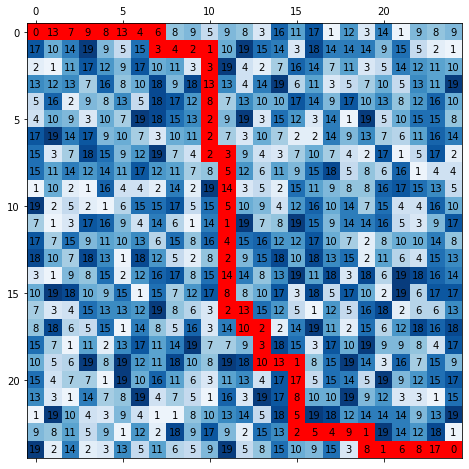

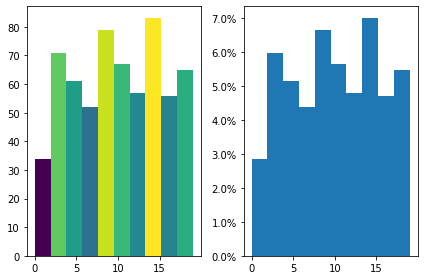

In [6]:
start_game(gridsize=25,mode=1,shortest_path=True)